In [ ]:
# Libraries and functions

In [1]:
import helper
from helper import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib inline

pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.
/home/rneves/anaconda3/envs/python3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Load Data

In [2]:
datasets = []

RUL_BY_PART = True

path = '/home/rneves/thesis/Turbofan_Engine/' # path to numpy arrays to plot t-sne

df_train = pd.read_pickle(path + 'dataframes/train__1')
df_test = pd.read_pickle(path + 'dataframes/test__1')

if RUL_BY_PART:
    df_train['RUL'] = df_train.apply(lambda r: RUL_by_parts(r), axis=1)
    df_test['RUL'] = df_test.apply(lambda r: RUL_by_parts(r), axis=1)

df_train.sort_values(by=['dataset_id', 'unit_id', 'cycle'], inplace=True)
df_test.sort_values(by=['dataset_id', 'unit_id', 'cycle'], inplace=True)

df_train.reset_index(drop = True, inplace=True)
df_test.reset_index(drop = True, inplace=True)

df_train, df_test = cat_to_continuous_Encoder(df_train, df_test)
#df_train, df_test = cat_to_continuous_Binarizer(df_train, df_test)

df_train.drop((['index']), axis=1, inplace=True)
df_test.drop((['index']), axis=1, inplace=True)

train_x = df_train.drop((['setting 1', 'setting 2', 'setting 3','dataset_id', 'RUL', 'unit_id', 'HDBScan', 'index_diff']), axis=1)
train_y = df_train['RUL'].copy()

#df_test = df_test[df_test['dataset_id'] == 'FD001']

test_x = df_test.drop((['setting 1', 'setting 2', 'setting 3','dataset_id', 'RUL', 'unit_id', 'HDBScan', 'index_diff']), axis=1).fillna(0)
test_y = df_test['RUL'].copy()

# Sensor plots

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))



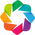

In [3]:
import numpy as np
import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import aggregate, shade, datashade, dynspread
from holoviews.operation import decimate
import gc
hv.notebook_extension('bokeh')

In [18]:
for col in df_train.columns:
    print(col)

dataset_id
unit_id
cycle
setting 1
setting 2
setting 3
sensor 1
sensor 2
sensor 3
sensor 4
sensor 5
sensor 6
sensor 7
sensor 8
sensor 9
sensor 10
sensor 11
sensor 12
sensor 13
sensor 14
sensor 15
sensor 16
sensor 17
sensor 18
sensor 19
sensor 20
sensor 21
RUL
HDBScan
sensor 1_rolling_min_5
sensor 2_rolling_min_5
sensor 3_rolling_min_5
sensor 4_rolling_min_5
sensor 5_rolling_min_5
sensor 6_rolling_min_5
sensor 7_rolling_min_5
sensor 8_rolling_min_5
sensor 9_rolling_min_5
sensor 10_rolling_min_5
sensor 11_rolling_min_5
sensor 12_rolling_min_5
sensor 13_rolling_min_5
sensor 14_rolling_min_5
sensor 15_rolling_min_5
sensor 16_rolling_min_5
sensor 17_rolling_min_5
sensor 18_rolling_min_5
sensor 19_rolling_min_5
sensor 20_rolling_min_5
sensor 21_rolling_min_5
sensor 1_rolling_min_10
sensor 2_rolling_min_10
sensor 3_rolling_min_10
sensor 4_rolling_min_10
sensor 5_rolling_min_10
sensor 6_rolling_min_10
sensor 7_rolling_min_10
sensor 8_rolling_min_10
sensor 9_rolling_min_10
sensor 10_rolling_min

## Plot sensors by dataset

In [19]:
%%opts Curve [width=300, height=300] {+axiswise}

vdims = [("sensor {}_rolling_mean_10".format(s)) for s in range(1,22)]

plot = hv.HoloMap(kdims = ['cycle']) # A HoloMap is an explorable multi-dimensional dictionary of HoloViews objects. A HoloMap cannot contain Layouts, NdLayouts, 
                                    #GridSpaces or other HoloMaps or DyamicMap but can contain any other HoloViews object. 
                                    #See the Building Composite Objects user guide for details on how to compose containers.

for sensor, vdim in enumerate(vdims):
    plot[(sensor)] = hv.Curve(df_train, vdims=[vdim,  'dataset_id', 'unit_id']).groupby(['dataset_id', 'unit_id'])
    


In [20]:
%%opts RGB [width=600, height=300] {+axiswise}

#do not plot sensors number: 1, 5, 6, 10, 16, 18, 19
((datashade(plot.get(11))) + (datashade(plot.get(14)))).cols(2)

:Layout
   .DynamicMap.I  :DynamicMap   [dataset_id,unit_id]
   .DynamicMap.II :DynamicMap   [dataset_id,unit_id]

In [17]:
del plot
gc.collect()

332943

## Correlation matrix

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


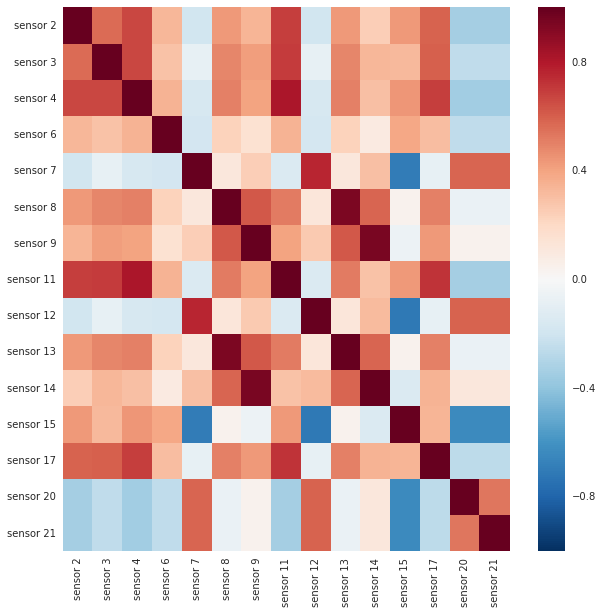

In [9]:
plt.figure(figsize=(10,10))

corr = df_train[['sensor 2','sensor 3', 'sensor 4', 'sensor 6', 'sensor 7', 'sensor 8', 'sensor 9', 'sensor 11', 'sensor 12', 'sensor 13', 'sensor 14', 'sensor 15', 'sensor 17', 'sensor 20', 'sensor 21']].corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

# T-sne

## Before Dropping

In [ ]:
df_train_type1_TSNE = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_type1[sensor_columns])
df_train_type2_TSNE = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_type2[['HDBScan'] + sensor_columns])

df_train_DF001_TSNE = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF001[sensor_columns])
df_train_DF002_TSNE = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF002[['HDBScan'] + sensor_columns])
df_train_DF003_TSNE = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF003[sensor_columns])
df_train_DF004_TSNE = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF004[['HDBScan'] + sensor_columns])

In [ ]:
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_TSNE', df_train_type1_TSNE, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_TSNE', df_train_type2_TSNE, allow_pickle=True)

np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD001_TSNE', df_train_DF001_TSNE, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_FD002_TSNE', df_train_DF002_TSNE, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD003_TSNE', df_train_DF003_TSNE, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type4_FD004_TSNE', df_train_DF004_TSNE, allow_pickle=True)

In [ ]:
df_train_type1_TSNE = np.load(path + 'numpy_files/type1_TSNE.npy')
df_train_type2_TSNE = np.load(path + 'numpy_files/type2_TSNE.npy')
df_train_DF001_TSNE = np.load(path + 'numpy_files/type1_FD001_TSNE.npy')
df_train_DF002_TSNE = np.load(path + 'numpy_files/type2_FD002_TSNE.npy')
df_train_DF003_TSNE = np.load(path + 'numpy_files/type1_FD003_TSNE.npy')
df_train_DF004_TSNE = np.load(path + 'numpy_files/type4_FD004_TSNE.npy')

In [ ]:
plt.figure(figsize=(30,30), facecolor='white')
plt.margins(0)
plt.axis('off')

plt.subplot(4,3,1)
plot_tsne(df_train_type1_TSNE, df_train_type1['RUL'])
plt.colorbar()

plt.subplot(4,3,2)
plot_tsne(df_train_type2_TSNE, df_train_type2['RUL'])
plt.colorbar()

plt.subplot(4,3,3)
plot_tsne(df_train_DF001_TSNE, df_train_DF001['RUL'])
plt.colorbar()

plt.subplot(4,3,4)
plot_tsne(df_train_DF002_TSNE, df_train_DF002['RUL'])
plt.colorbar()

plt.subplot(4,3,5)
plot_tsne(df_train_DF003_TSNE, df_train_DF003['RUL'])
plt.colorbar()

plt.subplot(4,3,6)
plot_tsne(df_train_DF004_TSNE, df_train_DF004['RUL'])
plt.colorbar()

plt.subplot(4,3,7)
plot_tsne(df_train_type1_TSNE, df_train_type1['HDBScan'])
plt.colorbar()

plt.subplot(4,3,8)
plot_tsne(df_train_type2_TSNE, df_train_type2['HDBScan'])
plt.colorbar()

plt.subplot(4,3,9)
plot_tsne(df_train_DF001_TSNE, df_train_DF001['HDBScan'])
plt.colorbar()

plt.subplot(4,3,10)
plot_tsne(df_train_DF002_TSNE, df_train_DF002['HDBScan'])
plt.colorbar()

plt.subplot(4,3,11)
plot_tsne(df_train_DF003_TSNE, df_train_DF003['HDBScan'])
plt.colorbar()

plt.subplot(4,3,12)
plot_tsne(df_train_DF004_TSNE, df_train_DF004['HDBScan'])
plt.colorbar()


## After Dropping

In [ ]:
df_train_type1_TSNE_dropped = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_type1_dropped)
df_train_type2_TSNE_dropped = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_type2_dropped)

df_train_DF001_TSNE_dropped = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF001_dropped)
df_train_DF002_TSNE_dropped = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF002_dropped)
df_train_DF003_TSNE_dropped = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF003_dropped)
df_train_DF004_TSNE_dropped = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF004_dropped)

In [ ]:
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_TSNE_dropped', df_train_type1_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_TSNE_dropped', df_train_type2_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD001_TSNE_dropped', df_train_DF001_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_FD002_TSNE_dropped', df_train_DF002_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD003_TSNE_dropped', df_train_DF003_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type4_FD004_TSNE_dropped', df_train_DF004_TSNE_dropped, allow_pickle=True)

In [ ]:
df_train_type1_TSNE_dropped = np.load(path + 'numpy_files/type1_TSNE_dropped.npy')
df_train_type2_TSNE_dropped = np.load(path + 'numpy_files/type2_TSNE_dropped.npy')
df_train_DF001_TSNE_dropped = np.load(path + 'numpy_files/type1_FD001_TSNE_dropped.npy')
df_train_DF002_TSNE_dropped = np.load(path + 'numpy_files/type2_FD002_TSNE_dropped.npy')
df_train_DF003_TSNE_dropped = np.load(path + 'numpy_files/type1_FD003_TSNE_dropped.npy')
df_train_DF004_TSNE_dropped = np.load(path + 'numpy_files/type4_FD004_TSNE_dropped.npy')

In [ ]:
plt.figure(figsize=(30,30), facecolor='white')
plt.margins(0)
plt.axis('off')

plt.subplot(4,3,1)
plot_tsne(df_train_type1_TSNE_dropped, df_train_type1['RUL'])
plt.colorbar()

plt.subplot(4,3,2)
plot_tsne(df_train_type2_TSNE_dropped, df_train_type2['RUL'])
plt.colorbar()

plt.subplot(4,3,3)
plot_tsne(df_train_DF001_TSNE_dropped, df_train_DF001['RUL'])
plt.colorbar()

plt.subplot(4,3,4)
plot_tsne(df_train_DF002_TSNE_dropped, df_train_DF002['RUL'])
plt.colorbar()

plt.subplot(4,3,5)
plot_tsne(df_train_DF003_TSNE_dropped, df_train_DF003['RUL'])
plt.colorbar()

plt.subplot(4,3,6)
plot_tsne(df_train_DF004_TSNE_dropped, df_train_DF004['RUL'])
plt.colorbar()

plt.subplot(4,3,7)
plot_tsne(df_train_type1_TSNE_dropped, df_train_type1['unit_id'])
plt.colorbar()

plt.subplot(4,3,8)
plot_tsne(df_train_type2_TSNE_dropped, df_train_type2['HDBScan'])
plt.colorbar()

plt.subplot(4,3,9)
plot_tsne(df_train_DF001_TSNE_dropped, df_train_DF001['unit_id'])
plt.colorbar()

plt.subplot(4,3,10)
plot_tsne(df_train_DF002_TSNE_dropped, df_train_DF002['HDBScan'])
plt.colorbar()

plt.subplot(4,3,11)
plot_tsne(df_train_DF003_TSNE_dropped, df_train_DF003['unit_id'])
plt.colorbar()

plt.subplot(4,3,12)
plot_tsne(df_train_DF004_TSNE_dropped, df_train_DF004['HDBScan'])
plt.colorbar()


## Normalization

In [ ]:
df_train_type1_TSNE_normalized = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_type1_normalize_dropped)
df_train_type2_TSNE_normalized = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_type2_normalize_dropped)

df_train_DF001_TSNE_normalized = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF001_normalize_dropped)
df_train_DF002_TSNE_normalized = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF002_normalize_dropped)
df_train_DF003_TSNE_normalized = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF003_normalize_dropped)
df_train_DF004_TSNE_normalized = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_DF004_normalize_dropped)

df_train_all_TSNE_normalized = TSNE(n_components=2, n_jobs=-1).fit_transform(df_train_all_normalize_dropped)

In [ ]:
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_TSNE_normalized_dropped', df_train_type1_TSNE_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_TSNE_normalized_dropped', df_train_type2_TSNE_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD001_TSNE_normalized_dropped', df_train_DF001_TSNE_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_FD002_TSNE_normalized_dropped', df_train_DF002_TSNE_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD003_TSNE_normalized_dropped', df_train_DF003_TSNE_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type4_FD004_TSNE_normalized_dropped', df_train_DF004_TSNE_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/train_all_TSNE_normalized_dropped', df_train_all_TSNE_normalized, allow_pickle=True)

In [ ]:
df_train_type1_TSNE_normalized = np.load(path + 'numpy_files/type1_TSNE_normalized_dropped.npy')
df_train_type2_TSNE_normalized = np.load(path + 'numpy_files/type2_TSNE_normalized_dropped.npy')
df_train_DF001_TSNE_normalized = np.load(path + 'numpy_files/type1_FD001_TSNE_normalized_dropped.npy')
df_train_DF002_TSNE_normalized = np.load(path + 'numpy_files/type2_FD002_TSNE_normalized_dropped.npy')
df_train_DF003_TSNE_normalized = np.load(path + 'numpy_files/type1_FD003_TSNE_normalized_dropped.npy')
df_train_DF004_TSNE_normalized = np.load(path + 'numpy_files/type4_FD004_TSNE_normalized_dropped.npy')
df_train_all_TSNE_normalized = np.load(path + 'numpy_files/train_all_TSNE_normalized_dropped.npy')

In [ ]:
plt.figure(figsize=(30,30), facecolor='white')
plt.margins(0)
plt.axis('off')

plt.subplot(4,3,1)
plot_tsne(df_train_type1_TSNE_normalized, df_train_type1['RUL'])
plt.colorbar()

plt.subplot(4,3,2)
plot_tsne(df_train_type2_TSNE_normalized, df_train_type2['RUL'])
plt.colorbar()

plt.subplot(4,3,3)
plot_tsne(df_train_DF001_TSNE_normalized, df_train_DF001['RUL'])
plt.colorbar()

plt.subplot(4,3,4)
plot_tsne(df_train_DF002_TSNE_normalized, df_train_DF002['RUL'])
plt.colorbar()

plt.subplot(4,3,5)
plot_tsne(df_train_DF003_TSNE_normalized, df_train_DF003['RUL'])
plt.colorbar()

plt.subplot(4,3,6)
plot_tsne(df_train_DF004_TSNE_normalized, df_train_DF004['RUL'])
plt.colorbar()

plt.subplot(4,3,7)
plot_tsne(df_train_type1_TSNE_normalized, df_train_type1['unit_id'])
plt.colorbar()

plt.subplot(4,3,8)
plot_tsne(df_train_type2_TSNE_normalized, df_train_type2['HDBScan'])
plt.colorbar()

plt.subplot(4,3,9)
plot_tsne(df_train_DF001_TSNE_normalized, df_train_DF001['unit_id'])
plt.colorbar()

plt.subplot(4,3,10)
plot_tsne(df_train_DF002_TSNE_normalized, df_train_DF002['HDBScan'])
plt.colorbar()

plt.subplot(4,3,11)
plot_tsne(df_train_DF003_TSNE_normalized, df_train_DF003['unit_id'])
plt.colorbar()

plt.subplot(4,3,12)
plot_tsne(df_train_DF004_TSNE_normalized, df_train_DF004['HDBScan'])
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10), facecolor='white')
plot_tsne(df_train_all_TSNE_normalized, df_train_all_normalize['RUL'])
plt.colorbar()

# U-map

## Before Dropping

In [ ]:
df_train_type1_umap = umap.UMAP().fit_transform(df_train_type1[sensor_columns].values)
df_train_type2_umap = umap.UMAP().fit_transform(df_train_type2[['HDBScan'] + sensor_columns].values)

df_train_DF001_umap = umap.UMAP().fit_transform(df_train_DF001[sensor_columns].values)
df_train_DF002_umap = umap.UMAP().fit_transform(df_train_DF002[['HDBScan'] + sensor_columns].values)
df_train_DF003_umap = umap.UMAP().fit_transform(df_train_DF003[sensor_columns].values)
df_train_DF004_umap = umap.UMAP().fit_transform(df_train_DF004[['HDBScan'] + sensor_columns].values)

In [ ]:
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_umap', df_train_type1_umap, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_umap', df_train_type2_umap, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD001_umap', df_train_DF001_umap, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_FD002_umap', df_train_DF002_umap, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD003_umap', df_train_DF003_umap, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type4_FD004_umap', df_train_DF004_umap, allow_pickle=True)

In [ ]:
df_train_type1_umap = np.load(path + 'numpy_files/type1_umap.npy')
df_train_type2_umap = np.load(path + 'numpy_files/type2_umap.npy')
df_train_DF001_umap = np.load(path + 'numpy_files/type1_FD001_umap.npy')
df_train_DF002_umap = np.load(path + 'numpy_files/type2_FD002_umap.npy')
df_train_DF003_umap = np.load(path + 'numpy_files/type1_FD003_umap.npy')
df_train_DF004_umap = np.load(path + 'numpy_files/type4_FD004_umap.npy')

In [ ]:
plt.figure(figsize=(30,30), facecolor='white')
plt.margins(0)
plt.axis('off')

plt.subplot(4,3,1)
plot_tsne(df_train_type1_umap, df_train_type1['RUL'])
plt.colorbar()

plt.subplot(4,3,2)
plot_tsne(df_train_type2_umap, df_train_type2['RUL'])
plt.colorbar()

plt.subplot(4,3,3)
plot_tsne(df_train_DF001_umap, df_train_DF001['RUL'])
plt.colorbar()

plt.subplot(4,3,4)
plot_tsne(df_train_DF002_umap, df_train_DF002['RUL'])
plt.colorbar()

plt.subplot(4,3,5)
plot_tsne(df_train_DF003_umap, df_train_DF003['RUL'])
plt.colorbar()

plt.subplot(4,3,6)
plot_tsne(df_train_DF004_umap, df_train_DF004['RUL'])
plt.colorbar()

plt.subplot(4,3,7)
plot_tsne(df_train_type1_umap, df_train_type1['HDBScan'])
plt.colorbar()

plt.subplot(4,3,8)
plot_tsne(df_train_type2_umap, df_train_type2['HDBScan'])
plt.colorbar()

plt.subplot(4,3,9)
plot_tsne(df_train_DF001_umap, df_train_DF001['HDBScan'])
plt.colorbar()

plt.subplot(4,3,10)
plot_tsne(df_train_DF002_umap, df_train_DF002['HDBScan'])
plt.colorbar()

plt.subplot(4,3,11)
plot_tsne(df_train_DF003_umap, df_train_DF003['HDBScan'])
plt.colorbar()

plt.subplot(4,3,12)
plot_tsne(df_train_DF004_umap, df_train_DF004['HDBScan'])
plt.colorbar()

## After Dropping

In [ ]:
df_train_type1_umap_dropped = umap.UMAP().fit_transform(df_train_type1_dropped.values)
df_train_type2_umap_dropped = umap.UMAP().fit_transform(df_train_type2_dropped.values)

df_train_DF001_umap_dropped = umap.UMAP().fit_transform(df_train_DF001_dropped.values)
df_train_DF002_umap_dropped = umap.UMAP().fit_transform(df_train_DF002_dropped.values)
df_train_DF003_umap_dropped = umap.UMAP().fit_transform(df_train_DF003_dropped.values)
df_train_DF004_umap_dropped = umap.UMAP().fit_transform(df_train_DF004_dropped.values)

In [ ]:
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_umap_dropped', df_train_type1_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_umap_dropped', df_train_type2_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD001_umap_dropped', df_train_DF001_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_FD002_umap_dropped', df_train_DF002_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD003_umap_dropped', df_train_DF003_TSNE_dropped, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type4_FD004_umap_dropped', df_train_DF004_TSNE_dropped, allow_pickle=True)

In [ ]:
df_train_type1_TSNE_dropped = np.load(path + 'numpy_files/type1_umap_dropped.npy')
df_train_type2_TSNE_dropped = np.load(path + 'numpy_files/type2_umap_dropped.npy')

df_train_DF001_TSNE_dropped = np.load(path + 'numpy_files/type1_FD001_umap_dropped.npy')
df_train_DF002_TSNE_dropped = np.load(path + 'numpy_files/type2_FD002_umap_dropped.npy')
df_train_DF003_TSNE_dropped = np.load(path + 'numpy_files/type1_FD003_umap_dropped.npy')
df_train_DF004_TSNE_dropped = np.load(path + 'numpy_files/type4_FD004_umap_dropped.npy')

In [ ]:
plt.figure(figsize=(30,30), facecolor='white')
plt.margins(0)
plt.axis('off')

plt.subplot(4,3,1)
plot_tsne(df_train_type1_umap_dropped, df_train_type1['RUL'])
plt.colorbar()

plt.subplot(4,3,2)
plot_tsne(df_train_type2_umap_dropped, df_train_type2['RUL'])
plt.colorbar()

plt.subplot(4,3,3)
plot_tsne(df_train_DF001_umap_dropped, df_train_DF001['RUL'])
plt.colorbar()

plt.subplot(4,3,4)
plot_tsne(df_train_DF002_umap_dropped, df_train_DF002['RUL'])
plt.colorbar()

plt.subplot(4,3,5)
plot_tsne(df_train_DF003_umap_dropped, df_train_DF003['RUL'])
plt.colorbar()

plt.subplot(4,3,6)
plot_tsne(df_train_DF004_umap_dropped, df_train_DF004['RUL'])
plt.colorbar()

plt.subplot(4,3,7)
plot_tsne(df_train_type1_umap_dropped, df_train_type1['HDBScan'])
plt.colorbar()

plt.subplot(4,3,8)
plot_tsne(df_train_type2_umap_dropped, df_train_type2['HDBScan'])
plt.colorbar()

plt.subplot(4,3,9)
plot_tsne(df_train_DF001_umap_dropped, df_train_DF001['HDBScan'])
plt.colorbar()

plt.subplot(4,3,10)
plot_tsne(df_train_DF002_umap_dropped, df_train_DF002['HDBScan'])
plt.colorbar()

plt.subplot(4,3,11)
plot_tsne(df_train_DF003_umap_dropped, df_train_DF003['HDBScan'])
plt.colorbar()

plt.subplot(4,3,12)
plot_tsne(df_train_DF004_umap_dropped, df_train_DF004['HDBScan'])
plt.colorbar()

## Normalize

In [ ]:
df_train_type1_UMAP_normalized = umap.UMAP().fit_transform(df_train_type1_normalize_dropped.values)
df_train_type2_UMAP_normalized = umap.UMAP().fit_transform(df_train_type2_normalize_dropped.values)

df_train_DF001_UMAP_normalized = umap.UMAP().fit_transform(df_train_DF001_normalize_dropped.values)
df_train_DF002_UMAP_normalized = umap.UMAP().fit_transform(df_train_DF002_normalize_dropped.values)
df_train_DF003_UMAP_normalized = umap.UMAP().fit_transform(df_train_DF003_normalize_dropped.values)
df_train_DF004_UMAP_normalized = umap.UMAP().fit_transform(df_train_DF004_normalize_dropped.values)

df_train_all_UMAP_normalized = umap.UMAP().fit_transform(df_train_all_normalize_dropped.values)

In [ ]:
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_umap_dropped', df_train_type1_UMAP_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_umap_dropped', df_train_type2_UMAP_normalized, allow_pickle=True)

np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD001_umap_dropped', df_train_DF001_UMAP_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type2_FD002_umap_dropped', df_train_DF002_UMAP_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type1_FD003_umap_dropped', df_train_DF003_UMAP_normalized, allow_pickle=True)
np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/type4_FD004_umap_dropped', df_train_DF004_UMAP_normalized, allow_pickle=True)

np.save('/home/rneves/thesis/Turbofan_Engine/numpy_files/train_all_umap_dropped', df_train_all_UMAP_normalized, allow_pickle=True)

In [ ]:
df_train_type1_TSNE_dropped = np.load(path + 'numpy_files/type1_umap_dropped.npy')
df_train_type2_TSNE_dropped = np.load(path + 'numpy_files/type2_umap_dropped.npy')

df_train_DF001_TSNE_dropped = np.load(path + 'numpy_files/type1_FD001_umap_dropped.npy')
df_train_DF002_TSNE_dropped = np.load(path + 'numpy_files/type2_FD002_umap_dropped.npy')
df_train_DF003_TSNE_dropped = np.load(path + 'numpy_files/type1_FD003_umap_dropped.npy')
df_train_DF004_TSNE_dropped = np.load(path + 'numpy_files/type4_FD004_umap_dropped.npy')

df_train_DF004_TSNE_dropped = np.load(path + 'numpy_files/train_all_umap_dropped.npy')

In [ ]:
plt.figure(figsize=(30,30), facecolor='white')
plt.margins(0)
plt.axis('off')

plt.subplot(4,3,1)
plot_tsne(df_train_type1_UMAP_normalized, df_train_type1['RUL'])
plt.colorbar()

plt.subplot(4,3,2)
plot_tsne(df_train_type2_UMAP_normalized, df_train_type2['RUL'])
plt.colorbar()

plt.subplot(4,3,3)
plot_tsne(df_train_DF001_UMAP_normalized, df_train_DF001['RUL'])
plt.colorbar()

plt.subplot(4,3,4)
plot_tsne(df_train_DF002_UMAP_normalized, df_train_DF002['RUL'])
plt.colorbar()

plt.subplot(4,3,5)
plot_tsne(df_train_DF003_UMAP_normalized, df_train_DF003['RUL'])
plt.colorbar()

plt.subplot(4,3,6)
plot_tsne(df_train_DF004_UMAP_normalized, df_train_DF004['RUL'])
plt.colorbar()

plt.subplot(4,3,7)
plot_tsne(df_train_type1_UMAP_normalized, df_train_type1['HDBScan'])
plt.colorbar()

plt.subplot(4,3,8)
plot_tsne(df_train_type2_UMAP_normalized, df_train_type2['HDBScan'])
plt.colorbar()

plt.subplot(4,3,9)
plot_tsne(df_train_DF001_UMAP_normalized, df_train_DF001['HDBScan'])
plt.colorbar()

plt.subplot(4,3,10)
plot_tsne(df_train_DF002_UMAP_normalized, df_train_DF002['HDBScan'])
plt.colorbar()

plt.subplot(4,3,11)
plot_tsne(df_train_DF003_UMAP_normalized, df_train_DF003['HDBScan'])
plt.colorbar()

plt.subplot(4,3,12)
plot_tsne(df_train_DF004_UMAP_normalized, df_train_DF004['HDBScan'])
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10), facecolor='white')
plot_tsne(df_train_all_UMAP_normalized, df_train_all_normalize['RUL'])
plt.colorbar()

# PCA

In [21]:
number = [2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 20, 21]
length = [5, 10]

sensor_columns = ["sensor {}".format(s) for s in number]
sensor_columns_rolling_mean = ["sensor {}_rolling_mean_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_std = ["sensor {}_rolling_std_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_min = ["sensor {}_rolling_min_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_max = ["sensor {}_rolling_max_{}".format(x, s) for s in length for x in number]
sensor_columns_rolling_median = ["sensor {}_rolling_median_{}".format(x, s) for s in length for x in number]


sensor_columns_diff = ["sensor {}_diff".format(s) for s in number]
sensor_columns_rolling_mean_diff = ["sensor {}_rolling_mean_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_std_diff = ["sensor {}_rolling_std_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_min_diff = ["sensor {}_rolling_min_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_max_diff = ["sensor {}_rolling_max_{}_diff".format(x, s) for s in length for x in number]
sensor_columns_rolling_median_diff = ["sensor {}_rolling_median_{}_diff".format(x, s) for s in length for x in number]

In [27]:
df_train_temp = df_train
df_test_temp = df_test

columns_to_plot =  sensor_columns + sensor_columns_diff

#columns_to_plot = list(np.append(columns_to_plot, ['setting_op_one_hot']))

PCA_train = PCA(n_components=2).fit(df_train_temp[columns_to_plot].values)

pca_figure = PCA_train.transform(df_train_temp.loc[df_train_temp['RUL'] > 0, columns_to_plot].values)
pca_figure_test = PCA_train.transform(df_test_temp.loc[df_test_temp['RUL'] > 0, columns_to_plot].values)

In [28]:
PCA_train.explained_variance_ratio_.sum()

0.4731069877512612

/home/rneves/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


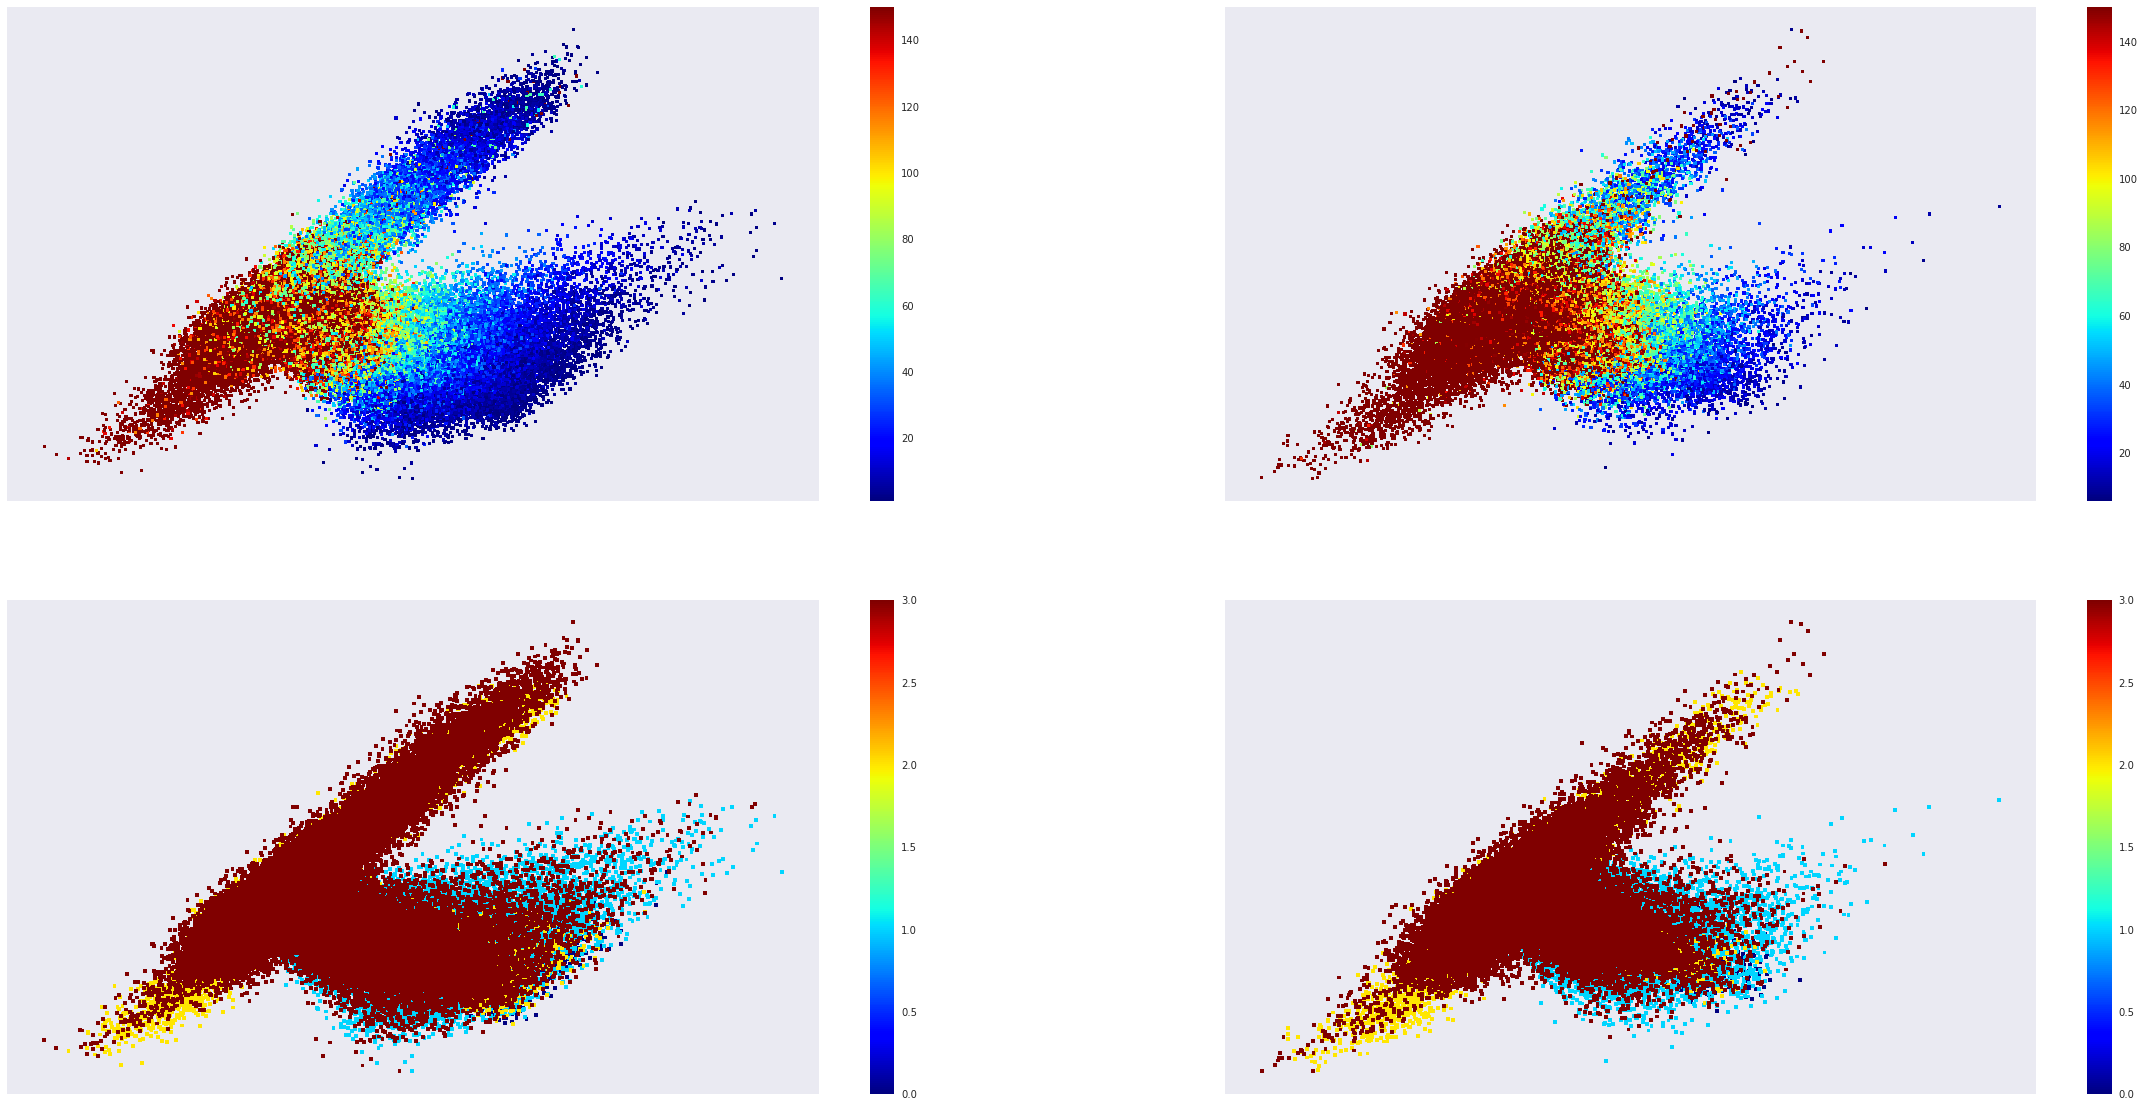

In [30]:
plt.figure(figsize=(40,20))

plt.subplot(2,2,1)
plot_figure(pca_figure, df_train_temp.loc[df_train_temp['RUL'] > 0, 'RUL'], s=10)

plt.subplot(2,2,2)
plot_figure(pca_figure_test, df_test_temp.loc[df_test_temp['RUL'] > 0, 'RUL'], s=10)

plt.subplot(2,2,3)
plot_figure(pca_figure, df_train_temp.loc[df_train_temp['RUL'] > 0, 'dataset_id_one_hot'], s=15)

plt.subplot(2,2,4)
plot_figure(pca_figure_test, df_test_temp.loc[df_test_temp['RUL'] > 0, 'dataset_id_one_hot'], s=15)
